Dataset shape: (284807, 31)
Fraud cases: 492
Non-fraud cases: 284315
Confusion Matrix:
 [[83013  2136]
 [ 6928 78512]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589


ROC AUC Score: 0.9469142096056075


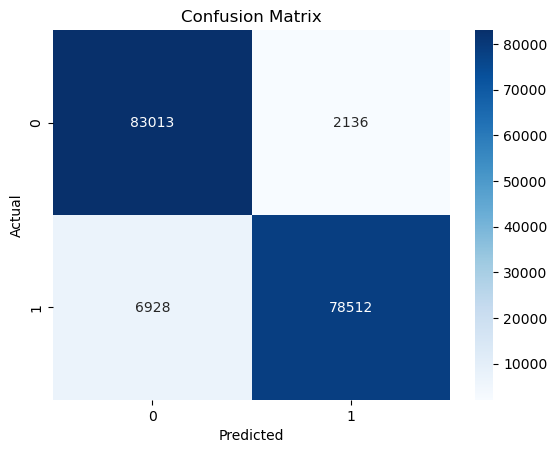

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Basic info
print("Dataset shape:", df.shape)
print("Fraud cases:", df[df['Class'] == 1].shape[0])
print("Non-fraud cases:", df[df['Class'] == 0].shape[0])

# Scale the 'Amount' column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df = df.drop(['Time'], axis=1)

# Features and Labels
X = df.drop('Class', axis=1)
y = df['Class']

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
